In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
a1 = 10.
a2 = 1.
w1 = 1./32
w2 = 1./2
x = np.arange(256)
f = a1 * np.sin(w1 * x) + a2 * np.sin(w2 * x)

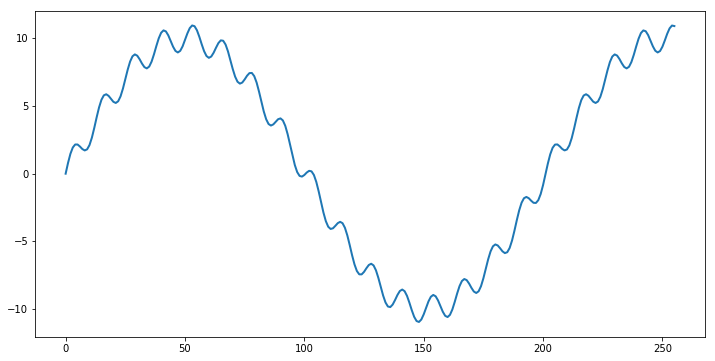

In [4]:
figure(figsize=(12,6))
plot(f, linewidth=2)

In [6]:
A = np.eye(256)
for k in xrange(1, 15):
    A += np.diag(np.ones(256), k=k)[:256, :256]
    A += np.diag(np.ones(256), k=-k)[:256, :256]

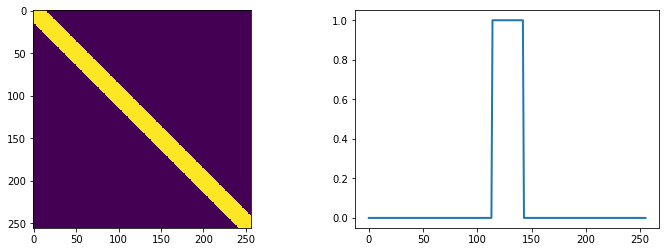

In [7]:
fig, axs = subplots(figsize=(12,4), ncols=2, nrows=1)
axs[0].imshow(A)
axs[1].plot(A[128,:], linewidth=2)

In [8]:
np.random.seed(56)
sigma_sq = 2.
nu = sigma_sq * np.random.normal(size=256)
xi = np.dot(A, f) + nu

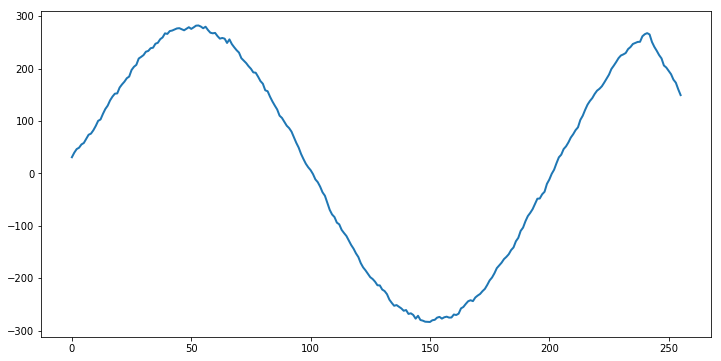

In [10]:
figure(figsize=(12,6))
plot(xi, linewidth=2)

# LEAST SQUARES ESTIMATE

In [11]:
R = np.dot(
        np.linalg.inv(np.dot(A.T, A)),
        A.T
    )
Rxi = np.dot(R, xi)

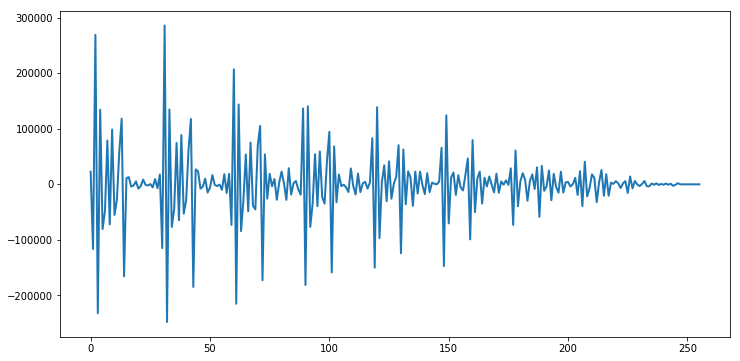

In [12]:
figure(figsize=(12,6))
plot(Rxi, linewidth=2)

# WHAT?

# MAYBE YOU HEARD OF 'PSEUDOINVERSE'

In [13]:
R_pinv = np.linalg.pinv(A)
R_pinv_xi = np.dot(R_pinv, xi)

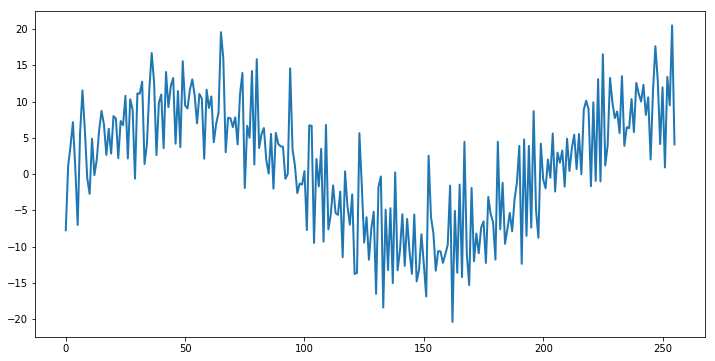

In [14]:
figure(figsize=(12,6))
plot(R_pinv_xi, linewidth=2)

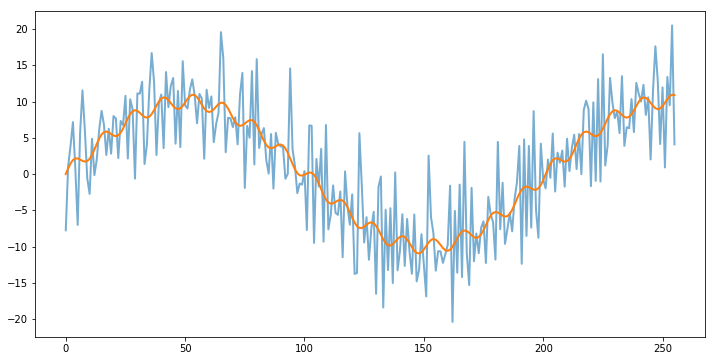

In [16]:
figure(figsize=(12,6))
plot(R_pinv_xi, linewidth=2, alpha=0.6)
plot(f, linewidth=2)

# NOT QUITE THERE YET.

# REGULARIZE!

In [27]:
c = 100.
R_reg = np.dot(
        np.linalg.inv(np.dot(A.T, A) + c * np.eye(256)),
        A.T
    )
Rxi_reg = np.dot(R_reg, xi)

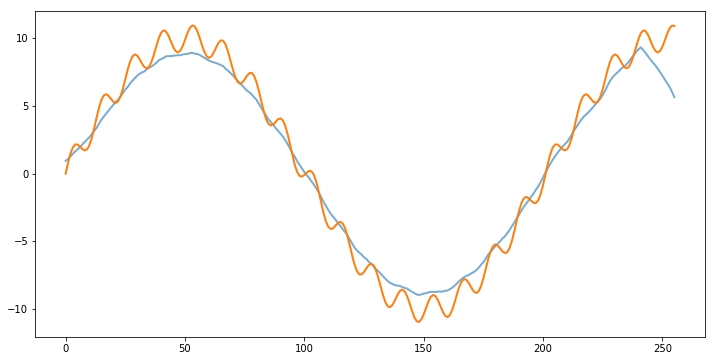

In [28]:
figure(figsize=(12,6))
plot(Rxi_reg, linewidth=2, alpha=0.6)
plot(f, linewidth=2)

# HOW DO YOU CHOOSE REG. CONSTANT?

In [29]:
reg_coeffs = np.linspace(0.5, 20, 40)
reg_loss = []
for c in reg_coeffs:
    R_reg = np.dot(
            np.linalg.inv(np.dot(A.T, A) + c * np.eye(256)),
            A.T
        )
    Rxi_reg = np.dot(R_reg, xi)
    loss = np.sum((f - Rxi_reg)**2)
    reg_loss.append(loss)

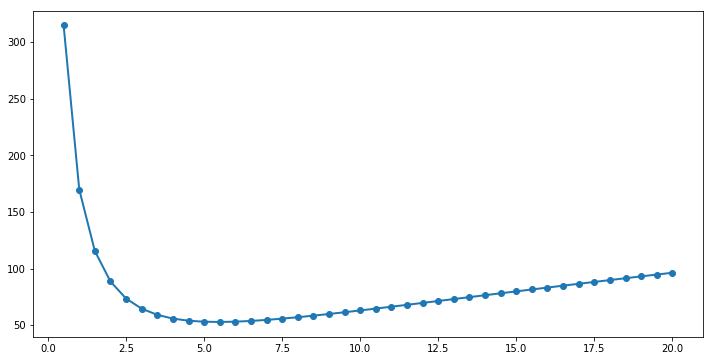

In [31]:
figure(figsize=(12,6))
plot(reg_coeffs, reg_loss, 'o-', linewidth=2)

In [32]:
reg_coeffs[np.argmin(reg_loss)]

5.5

# WHAT IS GOING ON

# COMPUTE THE SINGULAR VALUE DECOMPOTISION OF A
# (EIGENVALUES AND EIGENBASIS)

In [33]:
[U, S, V] = np.linalg.svd(A)

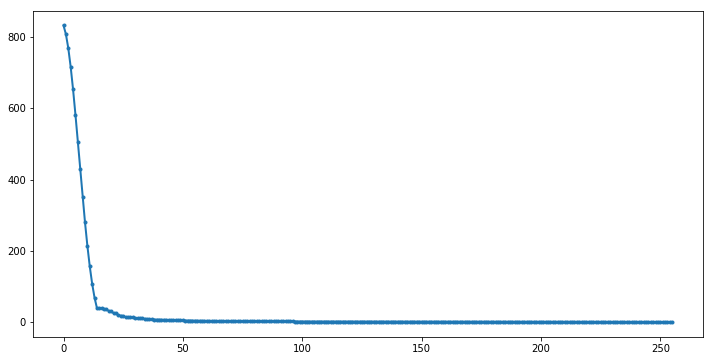

In [34]:
figure(figsize=(12,6))
plot(S**2, '.-', linewidth=2)

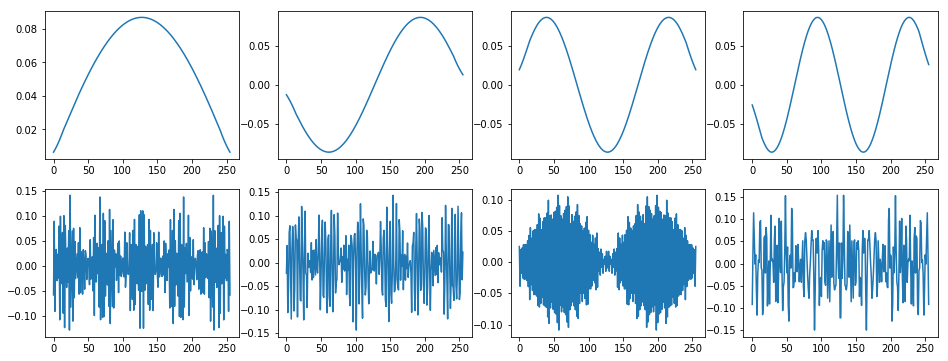

In [35]:
fig, axs = subplots(figsize=(16,6), ncols=4, nrows=2)
for i in xrange(4):
    axs[0, i].plot(V[i])
for i in xrange(4):
    axs[1, i].plot(V[-(4 + i)*20])

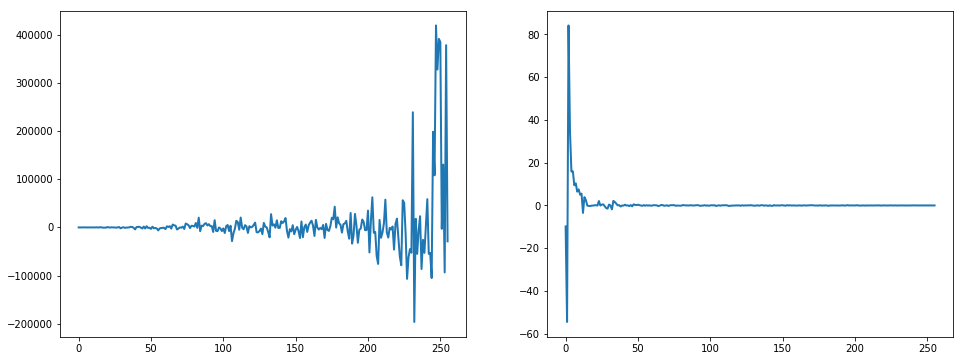

In [37]:
fig, axs = subplots(figsize=(16,6), ncols=2, nrows=1)
axs[0].plot(np.dot(V, Rxi), linewidth=2)
axs[1].plot(np.dot(V, Rxi_reg), linewidth=2)

# SWITCH TO EIGENBASIS OF A

In [38]:
f_wave = np.dot(V, f)
nu_wave = np.dot(V, nu)

In [39]:
A_wave = np.diag(S)

In [40]:
xi_wave = np.dot(A_wave, f_wave) + nu_wave

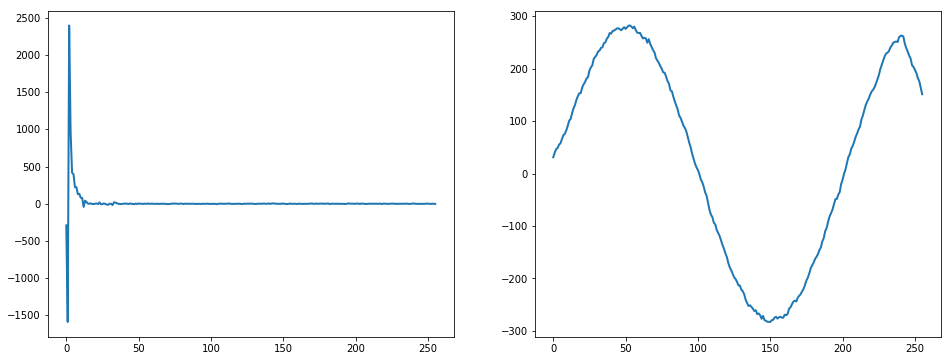

In [41]:
fig, axs = subplots(figsize=(16,6), ncols=2, nrows=1)
axs[0].plot(xi_wave, linewidth=2)
axs[1].plot(np.dot(V.T, xi_wave), linewidth=2)

In [42]:
R_wave = np.dot(
        np.linalg.inv(np.dot(A_wave.T, A_wave)),
        A_wave.T
)
R_wave_xi = np.dot(R_wave, xi_wave)

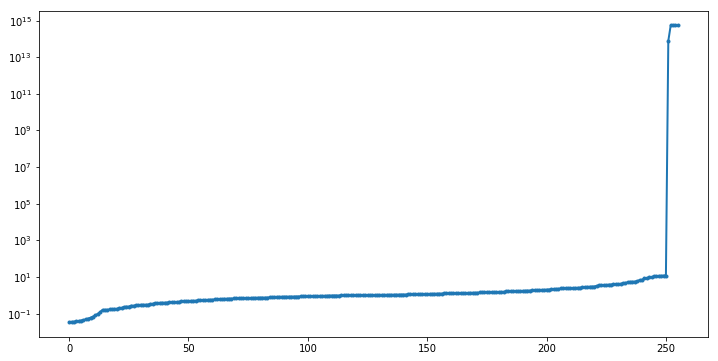

In [43]:
figure(figsize=(12,6))
plot(np.diag(R_wave), '.-', linewidth=2)
gca().set_yscale('log')

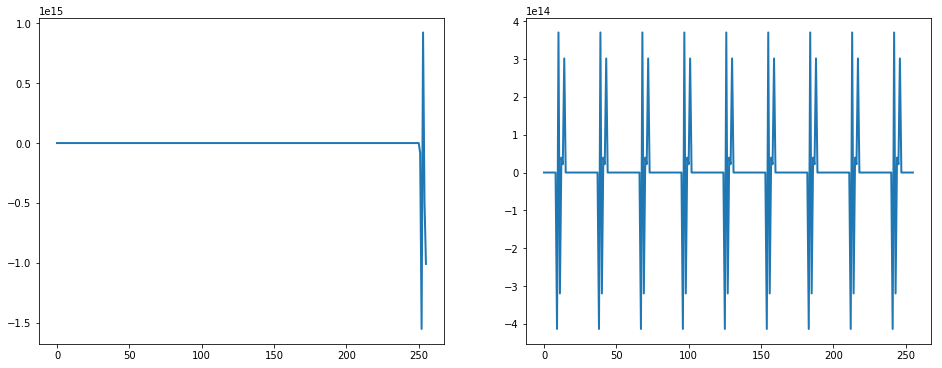

In [44]:
fig, axs = subplots(figsize=(16,6), ncols=2, nrows=1)
axs[0].plot(R_wave_xi, linewidth=2)
axs[1].plot(np.dot(V.T, R_wave_xi), linewidth=2)

In [46]:
np.linalg.pinv?

In [47]:
R_pinv_wave = np.linalg.pinv(A_wave)
R_pinv_wave_xi = np.dot(R_pinv_wave, xi_wave)

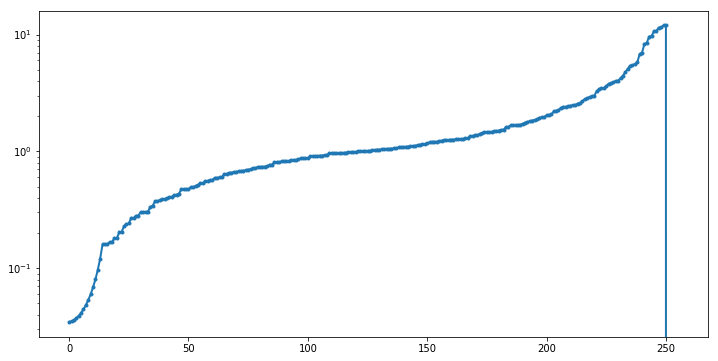

In [48]:
figure(figsize=(12,6))
plot(np.diag(R_pinv_wave), '.-', linewidth=2)
gca().set_yscale('log')

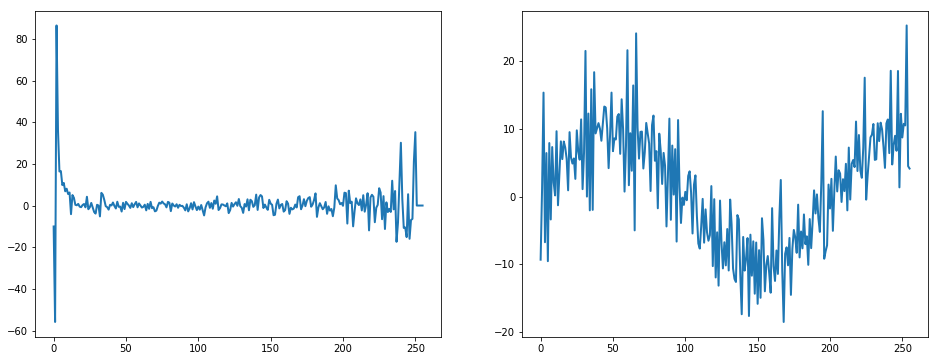

In [49]:
fig, axs = subplots(figsize=(16,6), ncols=2, nrows=1)
axs[0].plot(R_pinv_wave_xi, linewidth=2)
axs[1].plot(np.dot(V.T, R_pinv_wave_xi), linewidth=2)

In [61]:
c = 5.
R_wave_reg = np.dot(
        np.linalg.inv(np.dot(A_wave.T, A_wave) + c * np.eye(256)),
        A_wave.T
    )
R_wave_xi_reg = np.dot(R_wave_reg, xi_wave)

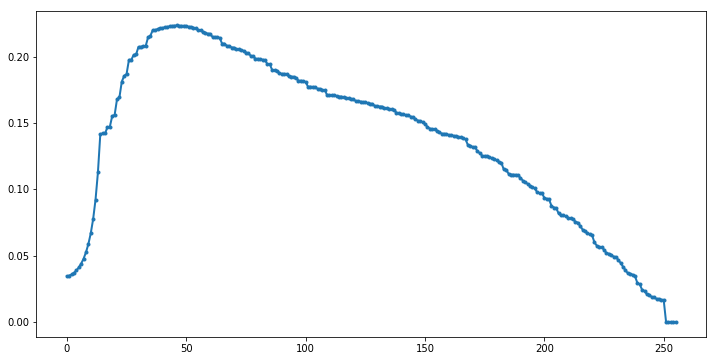

In [62]:
figure(figsize=(12,6))
plot(np.diag(R_wave_reg), '.-', linewidth=2)
# gca().set_yscale('log')

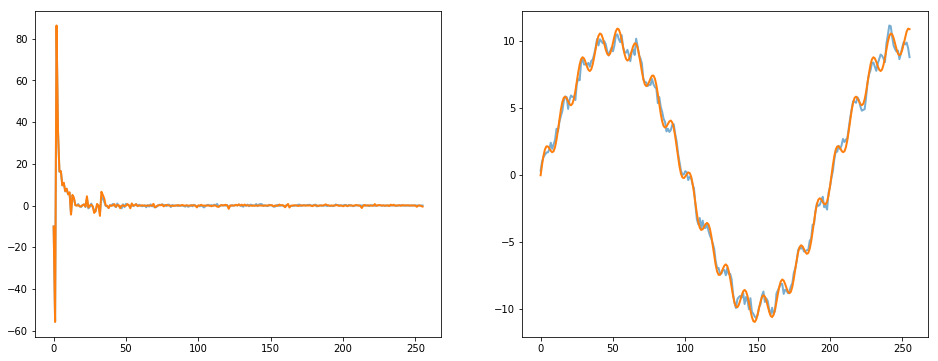

In [63]:
fig, axs = subplots(figsize=(16,6), ncols=2, nrows=1)
axs[0].plot(R_wave_xi_reg, linewidth=2, alpha=0.6)
axs[0].plot(f_wave, linewidth=2)
axs[1].plot(np.dot(V.T, R_wave_xi_reg), linewidth=2, alpha=0.6)
axs[1].plot(np.dot(V.T, f_wave), linewidth=2)